# Flow of Contents:

1. Data Extraction/ Cleaning of Predictor Variable (Police Strength)
2. Data Visualisation for Predictor Variable
3. Exploratory Data Analysis (EDA) for Predictor Variable
4. Data Extraction/ Cleaning of Predictor Variable (Rape Cases)
5. Data Visualisation for Response Variable
6. Machine Learning Algorithm for Prediction 1 (Linear Regression)
7. Removal of outliers from dataset
8. Machine Learning Algorithm for Prediction 2 (Polynomial Regression)
9. Machine Learning Algorithm for Prediction 3 (K-Nearest Neighbours)
10. Conclusion

In [1]:
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Basic Libraries
import numpy as np
import os
import pandas as pd
import seaborn as sb
import geopandas as gpd
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Data Extraction/ Cleaning for Predictor Variable (Police Strength in India)

In [3]:
## Reading file 17. ##

data1 = pd.read_csv('17_Case_reported_and_value_of_property_taken_away_by_place_of_occurrence_2001_2012.csv')
data2 = pd.read_csv('17_Crime_by_place_of_occurrence_2001_2012.csv')
#data1.info()
#data2.info()

In [4]:
## Filtering out data from file 17. to 2001-2010 only, as datasets contains data from 2001-2012 ##

df17_filtered1 = data1[data1['YEAR'] <= 2010]
df17_filtered2 = data2[data2['YEAR'] <= 2010]

## Converting it back to a CSV file ##
df17_filtered1.to_csv('17_Case_reported_and_value_of_property_taken_away_by_place_of_occurrence_2001_2010.csv', index=False)
df17_filtered2.to_csv('17_Crime_by_place_of_occurrence_2001_2010.csv', index=False)

In [5]:
path1 = ['10_Property_stolen_and_recovered.csv', '11_Property_stolen_and_recovered_nature_of_property.csv', '17_Case_reported_and_value_of_property_taken_away_by_place_of_occurrence_2001_2010.csv', '17_Crime_by_place_of_occurrence_2001_2010.csv']
path2 = ['12_Police_strength_actual_and_sanctioned.csv']
path3 = ['23_Anti_corruprion_cases.csv', '24_Anti_corruption_arrests.csv', '25_Complaints_against_police.csv', '35_Human_rights_violation_by_police.csv']

In [6]:
dfs1 = [] #10, 11, 17
dfs2 = [] #12
dfs3 = [] #23, 24, 25, 35

# for dfs1
for file_path in path1:
    df = pd.read_csv(file_path)
    dfs1.append(df)
    
# for dfs2
for file_path in path2:
    df = pd.read_csv(file_path)
    dfs2.append(df)
    
# for dfs3
for file_path in path3:
    df = pd.read_csv(file_path)
    dfs3.append(df)

In [7]:
combined_df2 = pd.concat(dfs2, ignore_index=True, join='outer', keys='Year')
#combined_df.head(n=50)

police_df = pd.DataFrame(combined_df2.groupby(['Area_Name']).sum().reset_index())
police_df = police_df.drop(columns = ['Year'])
#police_df

In [8]:
combined_df1 = pd.concat(dfs1, ignore_index=True, join='outer', keys='Year')
#combined_df.head(n=50)

property_df = pd.DataFrame(combined_df1.groupby(['Area_Name']).sum().reset_index())
property_df = property_df.drop(columns = ['Year'])
#property_df

In [9]:
combined_df3 = pd.concat(dfs3, ignore_index=True, join='outer', keys='Year')
#combined_df.head(n=50)

corruption_df = pd.DataFrame(combined_df3.groupby(['Area_Name']).sum().reset_index())
corruption_df = corruption_df.drop(columns = ['Year'])
#corruption_df

In [10]:
#corruption_df.info()
#property_df.info()
#police_df.info()

In [11]:
## Total Columns = 75 + 50 + 15 + = 140 ##

max_df = pd.concat([property_df, corruption_df, police_df], join='outer', keys='Year', axis=1)
max_df

Y  \
                    Area_Name   
0   Andaman & Nicobar Islands   
1              Andhra Pradesh   
2           Arunachal Pradesh   
3                       Assam   
4                       Bihar   
5                  Chandigarh   
6                Chhattisgarh   
7        Dadra & Nagar Haveli   
8                 Daman & Diu   
9                       Delhi   
10                        Goa   
11                    Gujarat   
12                    Haryana   
13           Himachal Pradesh   
14            Jammu & Kashmir   
15                  Jharkhand   
16                  Karnataka   
17                     Kerala   
18                Lakshadweep   
19             Madhya Pradesh   
20                Maharashtra   
21                    Manipur   
22                  Meghalaya   
23                    Mizoram   
24                   Nagaland   
25                     Odisha   
26                 Puducherry   
27                     Punjab   
28                  Rajasthan   
29                     Sikkim   
30                 Tamil Nadu   
31                    Tripura   
32              Uttar Pradesh   
33                Uttarakhand   
34                West Bengal   

                                                       \
                                           Group_Name   
0   Burglary - PropertyBurglary - PropertyBurglary...   
1   Burglary - PropertyBurglary - PropertyBurglary...   
2   Burglary - PropertyBurglary - PropertyBurglary...   
3   Burglary - PropertyBurglary - PropertyBurglary...   
4   Burglary - PropertyBurglary - PropertyBurglary...   
5   Burglary - PropertyBurglary - PropertyBurglary...   
6   Burglary - PropertyBurglary - PropertyBurglary...   
7   Burglary - PropertyBurglary - PropertyBurglary...   
8   Burglary - PropertyBurglary - PropertyBurglary...   
9   Burglary - PropertyBurglary - PropertyBurglary...   
10  Burglary - PropertyBurglary - PropertyBurglary...   
11  Burglary - PropertyBurglary - PropertyBurglary...   
12  Burglary - PropertyBurglary - PropertyBurglary...   
13  Burglary - PropertyBurglary - PropertyBurglary...   
14  Burglary - PropertyBurglary - PropertyBurglary...   
15  Burglary - PropertyBurglary - PropertyBurglary...   
16  Burglary - PropertyBurglary - PropertyBurglary...   
17  Burglary - PropertyBurglary - PropertyBurglary...   
18  Burglary - PropertyBurglary - PropertyBurglary...   
19  Burglary - PropertyBurglary - PropertyBurglary...   
20  Burglary - PropertyBurglary - PropertyBurglary...   
21  Burglary - PropertyBurglary - PropertyBurglary...   
22  Burglary - PropertyBurglary - PropertyBurglary...   
23  Burglary - PropertyBurglary - PropertyBurglary...   
24  Burglary - PropertyBurglary - PropertyBurglary...   
25  Burglary - PropertyBurglary - PropertyBurglary...   
26  Burglary - PropertyBurglary - PropertyBurglary...   
27  Burglary - PropertyBurglary - PropertyBurglary...   
28  Burglary - PropertyBurglary - PropertyBurglary...   
29  Burglary - PropertyBurglary - PropertyBurglary...   
30  Burglary - PropertyBurglary - PropertyBurglary...   
31  Burglary - PropertyBurglary - PropertyBurglary...   
32  Burglary - PropertyBurglary - PropertyBurglary...   
33  Burglary - PropertyBurglary - PropertyBurglary...   
34  Burglary - PropertyBurglary - PropertyBurglary...   

                                                       \
                                       Sub_Group_Name   
0   3. Burglary3. Burglary3. Burglary3. Burglary3....   
1   3. Burglary3. Burglary3. Burglary3. Burglary3....   
2   3. Burglary3. Burglary3. Burglary3. Burglary3....   
3   3. Burglary3. Burglary3. Burglary3. Burglary3....   
4   3. Burglary3. Burglary3. Burglary3. Burglary3....   
5   3. Burglary3. Burglary3. Burglary3. Burglary3....   
6   3. Burglary3. Burglary3. Burglary3. Burglary3....   
7   3. Burglary3. Burglary3. Burglary3. Burglary3....   
8   3. Burglary3. Burglary3. Burglary3. Burglary3....   
9   3. Burglary3. Burglary3. Burglary3. Burglary3....   
10  3. Burgl

In [12]:
max_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Columns: 140 entries, ('Y', 'Area_Name') to ('a', 'Rank_SSPSPAddlSPCommandant')
dtypes: float64(116), int64(12), object(12)
memory usage: 38.4+ KB


# Exploratory Data Analysis for Predictor Variable (Police Strength)

Which state has the greatest police strength? 

In [13]:
# Multi-Index present
print(max_df.columns)

MultiIndex([('Y',                          'Area_Name'),
            ('Y',                         'Group_Name'),
            ('Y',                     'Sub_Group_Name'),
            ('Y',           'Cases_Property_Recovered'),
            ('Y',              'Cases_Property_Stolen'),
            ('Y',        'Value_of_Property_Recovered'),
            ('Y',           'Value_of_Property_Stolen'),
            ('Y',                           'STATE/UT'),
            ('Y',                               'YEAR'),
            ('Y',                'Place Of Occurrence'),
            ...
            ('a',        'Rank_ASPDySPAssttCommandant'),
            ('a', 'Rank_Below_HC_and_Above_Constables'),
            ('a',                    'Rank_Constables'),
            ('a',                     'Rank_DGAddl_DG'),
            ('a',                           'Rank_DIG'),
            ('a',               'Rank_Head_Constables'),
            ('a',                       'Rank_IGSplIG'),
            ('a

In [14]:
# Extracting data from DataFrame 'Y'
data_Y = max_df.loc[:, 'Y']

# Extracting data from DataFrame 'a'
data_a = max_df.loc[:, 'a']

# Accessing specific columns from each DataFrame
area_name_a = data_a['Area_Name']
rank_all_ranks_total_a = data_a['Rank_All_Ranks_Total']

###### Extracted database below shows the total number of sanctioned police officers in each state, from 2001 to 2010.

In [15]:
# Creating a new DataFrame with the selected columns

PoliceTotalDF = pd.DataFrame({'Area_Name': area_name_a, 'Rank_All_Ranks_Total': rank_all_ranks_total_a})
PoliceTotalDF.columns=['Area Name', 'Average Sanctioned Police Officers per year from 2001 - 2010']
PoliceTotalDF

,Area Name,Average Sanctioned Police Officers per year from 2001 - 2010
0,Andaman & Nicobar Islands,127674
1,Andhra Pradesh,3612310
2,Arunachal Pradesh,261616
3,Assam,2183948
4,Bihar,2642260
5,Chandigarh,184564
6,Chhattisgarh,1183460
7,Dadra & Nagar Haveli,9608
8,Daman & Diu,9492
9,Delhi,2613846


##### Since this is the total from 2001 to 2010, we divide by 10 to calculate the mean no. of sanctioned police officers per year in each state in India.

In [16]:
# Dividing value of police officers by 10
PoliceTotalDF['Average Sanctioned Police Officers per year from 2001 - 2010'] = PoliceTotalDF['Average Sanctioned Police Officers per year from 2001 - 2010'] / 10

#PoliceTotalDF

# Data Visualisation for Predictor Variable (Police Strength)

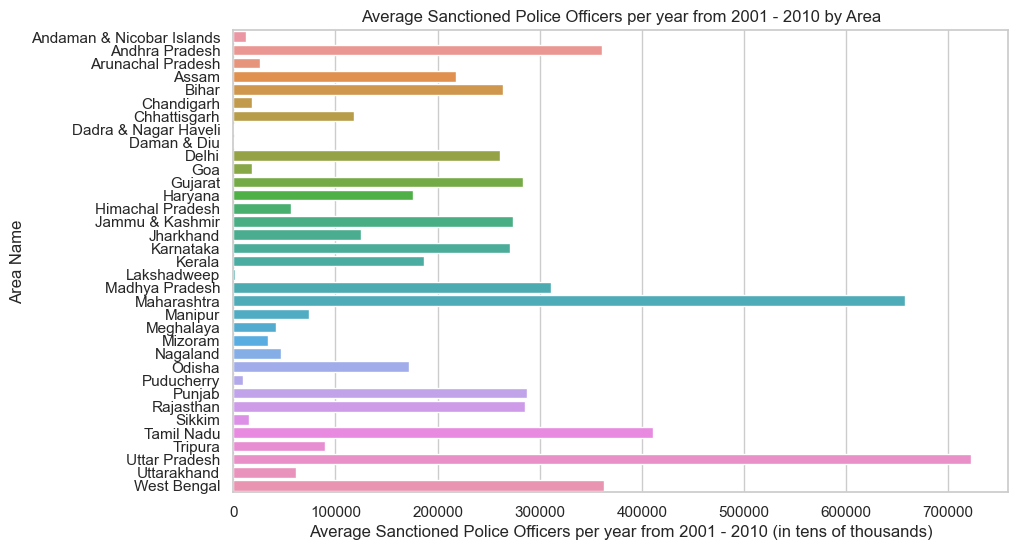

In [17]:
# Set the style of the seaborn plot
sb.set(style="whitegrid")

# Plotting the data
plt.figure(figsize=(10, 6))
sb.barplot(x='Average Sanctioned Police Officers per year from 2001 - 2010', y='Area Name', data=PoliceTotalDF)

# Adding labels and title
plt.xlabel('Average Sanctioned Police Officers per year from 2001 - 2010 (in tens of thousands)')
plt.ylabel('Area Name')
plt.title('Average Sanctioned Police Officers per year from 2001 - 2010 by Area')

# Show plot
plt.show()

In [18]:
# Set the style of the seaborn plot
#sb.set(style="whitegrid")

# Plotting the data
#plt.figure(figsize=(12, 8))
#sb.lineplot(x='Area Name', y='Average Sanctioned Police Officers per year from 2001 - 2010', data=PoliceTotalDF, marker='o')

# Rotating x-axis labels for better visibility
#plt.xticks(rotation=90)

# Adding labels and title
#plt.xlabel('Area Name')
#plt.ylabel('Average Sanctioned Police Officers per year from 2001 - 2010 (in tens of thousands)')
#plt.title('Average Sanctioned Police Officers per year from 2001 - 2010 by Area')

# Show plot
#plt.show()

From the Barplot and Line graphs above, we can visualise the mean number of police officers in each state of India. 
The state of Uttar Pradesh has the most number of sanctioned police officers at >700,000, followed somewhat closely by the state of Maharashtra, with >650,000.

In [19]:
# Finding Top 5 states in India with highest no. of sanctioned police officers

# Sort the DataFrame by the "Total Sanctioned Police Officers from 2001 - 2010" column in descending order
top_5_states = PoliceTotalDF.sort_values(by='Average Sanctioned Police Officers per year from 2001 - 2010', ascending=False).head(5)
top_5_states.reset_index(drop=True, inplace=True)

# Display the top 5 states
print(top_5_states.to_string(index=False))

     Area Name  Average Sanctioned Police Officers per year from 2001 - 2010
 Uttar Pradesh                                                      722843.4
   Maharashtra                                                      657602.8
    Tamil Nadu                                                      410843.2
   West Bengal                                                      362562.4
Andhra Pradesh                                                      361231.0


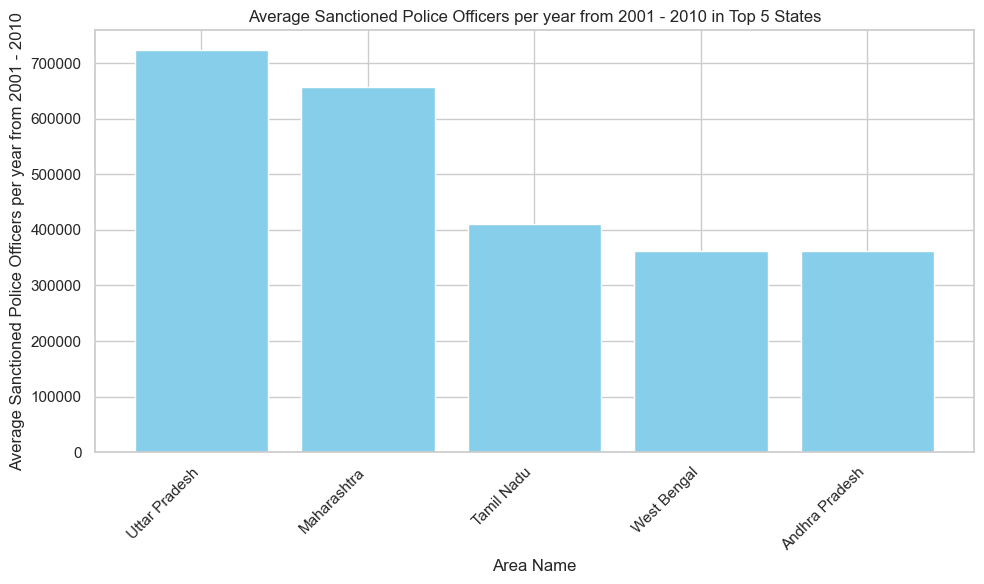

In [20]:
# Plotting Top 5 states histogram
plt.figure(figsize=(10, 6))
plt.bar(top_5_states['Area Name'], top_5_states['Average Sanctioned Police Officers per year from 2001 - 2010'], color='skyblue')
plt.xlabel('Area Name')
plt.ylabel('Average Sanctioned Police Officers per year from 2001 - 2010')
plt.title('Average Sanctioned Police Officers per year from 2001 - 2010 in Top 5 States')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The above shows the Top 5 states in India with the highest number of sanctioned police officers, with Uttar Pradesh leading the line of law enforcement.

In [21]:
# Describe the PoliceTotalDF dataframe
PoliceTotalDF['Average Sanctioned Police Officers per year from 2001 - 2010'].describe()

count        35.000000
mean     178805.200000
std      179433.673003
min         949.200000
25%       30151.500000
50%      125141.400000
75%      278472.000000
max      722843.400000
Name: Average Sanctioned Police Officers per year from 2001 - 2010, dtype: float64

From this, we can see that on average there are around ~17,880 sanctioned police officers per state in India.

But, the number of sanctioned police officers might differ because of the size of each state. 
Logically speaking, the larger the state, the higher the number of police officers. 

Let's take into account and visualise the size of each state, compared to the number of sanctioned police officers.

In [61]:
# Importing Map of India dataset
shp_gdf = gpd.read_file('Indian_states.shp')
#shp_gdf

In [23]:
# Fixing spelling discrepancies in st_nm
shp_gdf['st_nm'] = shp_gdf['st_nm'].replace('Andaman & Nicobar Island', 'Andaman & Nicobar Islands')
shp_gdf['st_nm'] = shp_gdf['st_nm'].replace('Arunanchal Pradesh', 'Arunachal Pradesh')
shp_gdf['st_nm'] = shp_gdf['st_nm'].replace('Dadara & Nagar Havelli', 'Dadra & Nagar Haveli')
shp_gdf['st_nm'] = shp_gdf['st_nm'].replace('NCT of Delhi', 'Delhi')

In [24]:
merge =shp_gdf.set_index('st_nm').join(PoliceTotalDF.set_index('Area Name'))

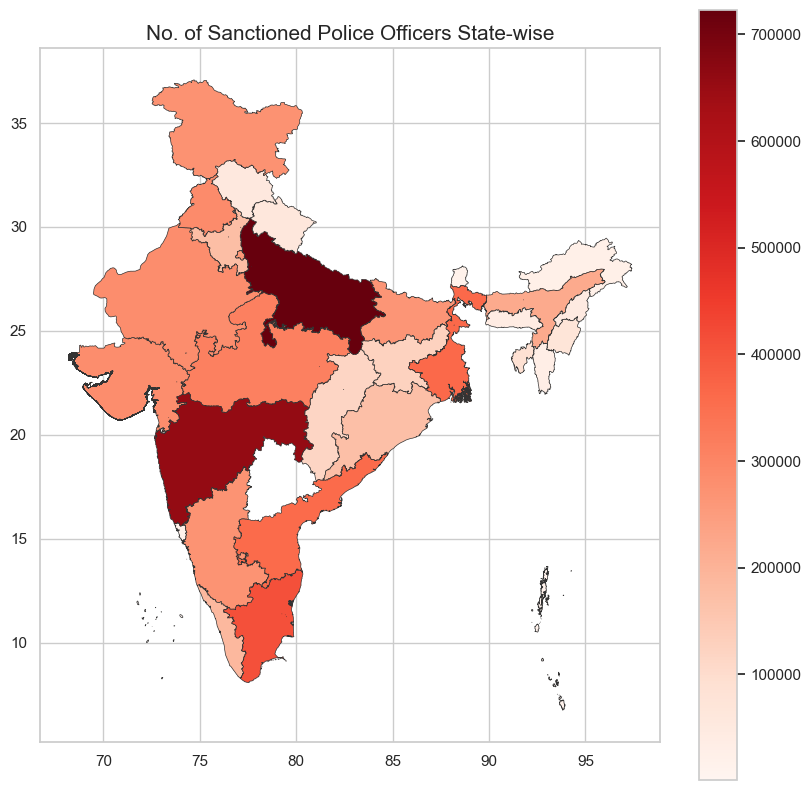

In [25]:
# Plotting map of India for visualisation of no. of sanctioned police officers
fig,ax=plt.subplots(1, figsize=(10,10))

ax.set_title('No. of Sanctioned Police Officers State-wise', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merge.plot(column='Average Sanctioned Police Officers per year from 2001 - 2010', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

The above visualisation shows the colour-coded number of sanctioned police officers in each state of India.

### Finding out the correlation between Size of State and Number of Sanctioned Police Officers

In [26]:
# Importing Size of States in India CSV file
state_size = pd.read_csv('List of states and union territories of India by area.csv')

In [27]:
# Checking data types
state_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Rank                                    37 non-null     object 
 1   State (S) / Union territory (UT)        37 non-null     object 
 2   Area (km2)                              37 non-null     object 
 3   Region                                  36 non-null     object 
 4   National Share (%)                      37 non-null     float64
 5   Country of comparable size (land mass)  36 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.9+ KB


In [28]:
# Dropping columns I do not need
state_size.drop(columns=['Region', 'Country of comparable size (land mass)'], inplace=True)

# Fixing State Name Discrepancies with PoliceTotalDF
state_size['State (S) / Union territory (UT)'] = state_size['State (S) / Union territory (UT)'].replace('NCT Delhi', 'Delhi')
state_size['State (S) / Union territory (UT)'] = state_size['State (S) / Union territory (UT)'].replace('Andaman and Nicobar Islands', 'Andaman & Nicobar Islands')
state_size['State (S) / Union territory (UT)'] = state_size['State (S) / Union territory (UT)'].replace('Dadra and Nagar Haveli and Daman and Diu', 'Dadra & Nagar Haveli')
state_size['State (S) / Union territory (UT)'] = state_size['State (S) / Union territory (UT)'].replace('Jammu and Kashmir', 'Jammu & Kashmir')

# Changing column names
state_size.rename(columns={'State (S) / Union territory (UT)': 'Area Name'}, inplace=True)

In [29]:
# Merging the DataFrames of state_size & PoliceTotalDF, to plot a correlation matrix
# Merge on 'Area Name' column
police_statesize_merged = pd.merge(PoliceTotalDF, state_size, on='Area Name')

#Dropping 'Rank' column, do not need it
police_statesize_merged.drop(columns=['Rank'], inplace=True)

police_statesize_merged

,Area Name,Average Sanctioned Police Officers per year from 2001 - 2010,Area (km2),National Share (%)
0,Andaman & Nicobar Islands,12767.4,"8,249",0.250
1,Andhra Pradesh,361231.0,"160,205",4.870
2,Arunachal Pradesh,26161.6,"83,743",2.540
3,Assam,218394.8,"78,438",2.380
4,Bihar,264226.0,"94,163",2.860
5,Chandigarh,18456.4,114,0.003
6,Chhattisgarh,118346.0,"135,191",4.110
7,Dadra & Nagar Haveli,960.8,603,0.010
8,Delhi,261384.6,"1,483",0.040
9,Goa,18351.0,"3,702",0.110


### Calculating Correlation Coefficient Size of State and Number of Sanctioned Police Officers

1 indicates a perfect positive linear relationship

-1 indicates a perfect negative linear relationship

0 indicates no linear relationship

In [62]:
# Checking data types
#police_statesize_merged.info()

In [31]:
# Area (km2) is an object, we need to convert it to a float to calculate correlation coefficient
police_statesize_merged['Area (km2)'] = police_statesize_merged['Area (km2)'].str.replace(',', '').astype(float)

In [32]:
# Calculate correlation coefficient
correlation_coefficient = police_statesize_merged['Average Sanctioned Police Officers per year from 2001 - 2010'].corr(police_statesize_merged['Area (km2)'])

# Calculate correlation matrix
correlation_matrix = police_statesize_merged[['Average Sanctioned Police Officers per year from 2001 - 2010', 'Area (km2)']]

print("Correlation Matrix:")
(correlation_matrix.corr())

Correlation Matrix:


,Average Sanctioned Police Officers per year from 2001 - 2010,Area (km2)
Average Sanctioned Police Officers per year from 2001 - 2010,1.000000,0.728433
Area (km2),0.728433,1.000000


Correlation Coefficient: 0.7284332774453195


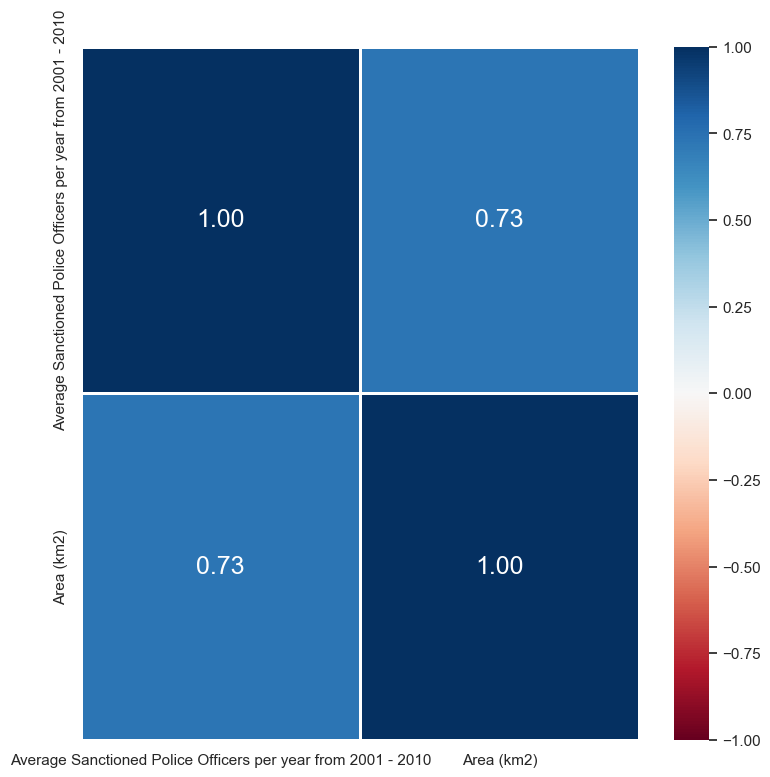

In [33]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(9, 9))
sb.heatmap(correlation_matrix.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

print("Correlation Coefficient:", correlation_coefficient)

A coefficient of 0.73, which is close to 1 suggests a moderately strong positive correlation, meaning that as one variable increases, the other tends to increase as well. 

In this case, it suggests that larger states tend to have more police officers on average.

### Density of Police Officers per State

Since larger states tend to have more police officers on average, which state has the highest concentration of police officers per km2?

In [34]:
# Given DataFrame
data = {
    'Area Name': ['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
    'Average Sanctioned Police Officers per year from 2001 - 2010': [12767.4, 361231.0, 26161.6, 218394.8, 264226.0, 18456.4, 118346.0, 960.8, 261384.6, 18351.0, 283152.0, 175437.0, 56900.8, 273792.0, 125141.4, 270495.2, 187078.4, 1486.4, 311341.6, 657602.8, 73922.4, 42112.6, 34141.4, 46226.8, 171809.6, 9711.8, 287913.6, 285560.6, 15398.4, 410843.2, 90150.2, 722843.4, 61329.2, 362562.4],
    'Area (km2)': [8249, 160205, 83743, 78438, 94163, 114, 135191, 603, 1483, 3702, 196024, 44212, 55673, 42241, 79714, 191791, 38863, 32, 308252, 307713, 22327, 22429, 21081, 16579, 155707, 479, 50362, 342239, 7096, 130058, 10486, 240928, 53483, 88752]
}

density_df = pd.DataFrame(data)

# Calculate concentration of police officers per km2
density_df['Concentration of Police Officers per km2'] = density_df['Average Sanctioned Police Officers per year from 2001 - 2010'] / density_df['Area (km2)']

# Sort the DataFrame in descending order based on concentration of police officers per square kilometer
density_df = density_df.sort_values(by='Concentration of Police Officers per km2', ascending=False)

# Display the sorted DataFrame
print("Concentration of Police Officers per km2 by State:")
(density_df[['Area Name', 'Concentration of Police Officers per km2']])

Concentration of Police Officers per km2 by State:


,Area Name,Concentration of Police Officers per km2
8,Delhi,176.253945
5,Chandigarh,161.898246
17,Lakshadweep,46.450000
25,Puducherry,20.275157
30,Tripura,8.597196
13,Jammu & Kashmir,6.481665
26,Punjab,5.716882
9,Goa,4.957050
16,Kerala,4.813792
33,West Bengal,4.085118


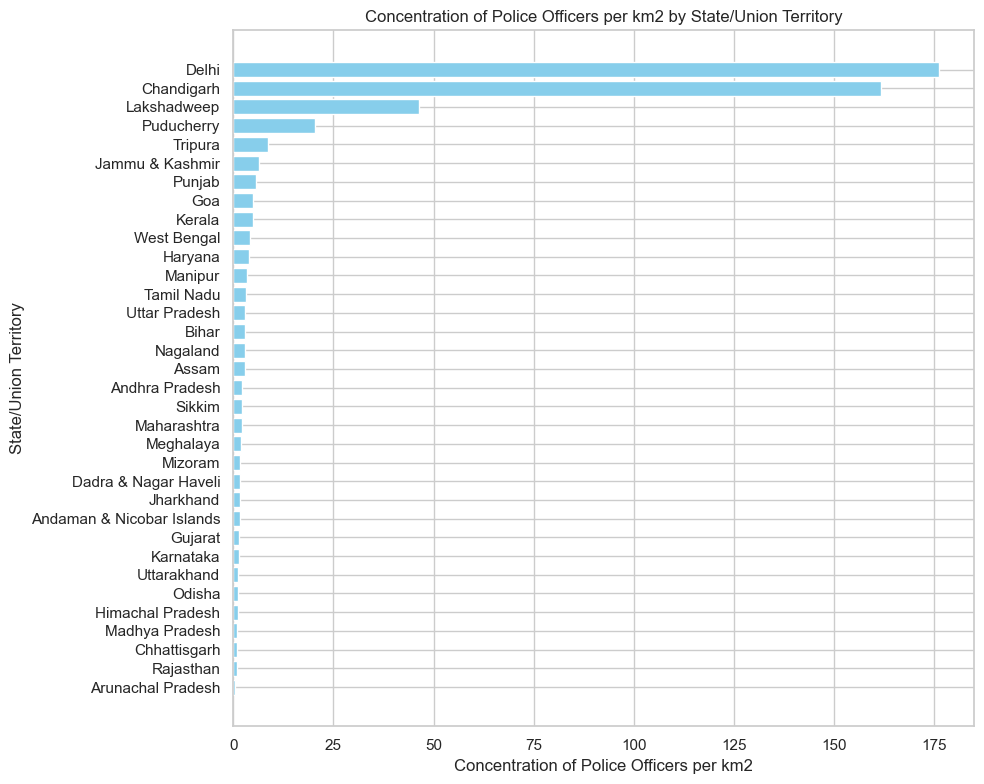

In [35]:
states = density_df['Area Name']
concentration = density_df['Concentration of Police Officers per km2']

# Plotting the graph
plt.figure(figsize=(10, 8))
plt.barh(states, concentration, color='skyblue')
plt.xlabel('Concentration of Police Officers per km2')
plt.ylabel('State/Union Territory')
plt.title('Concentration of Police Officers per km2 by State/Union Territory')
plt.gca().invert_yaxis()  # Invert y-axis to display highest concentration at the top
plt.tight_layout()
plt.show()

From the table & bar graph above, we can see that Delhi & Chandigarh have by far the highest concentrations of police officers per km2.

## Problem Statement:
## How likely is rape to be reported in India by State, based on various factors?

The factor we are delving into in this code segment is: 
Police Strength in each state (Total no. of police officers per state).


#### Predictor Variable: Police Strength per state (Column E: Ranks_All_Ranks_Total)

#### Response Variable: Rape cases per state (Column D: Rape)

# Data Extraction/ Cleaning for Response Variable (Rape Cases)

In [69]:
# Importing the response variable dataset
response_data = pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2012.csv')

response_data_filtered = response_data[response_data['Year'] <= 2010]

# Converting it back to a CSV file
response_data_filtered.to_csv('42_District_wise_crimes_committed_against_women_2001_2010.csv', index=False)

# Converting it into a Pandas Dataframe
response_data_new = pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2010.csv')
response_data_new = response_data_new[['STATE/UT', 'Year', 'Rape']]
#response_data_new

In [37]:
# Filter data for years 2001 to 2010
filtered_data = response_data_new[(response_data_new['Year'] >= 2001) & (response_data_new['Year'] <= 2010)]

# Group by 'STATE/UT' and sum up the 'Rape' column
grouped_data = filtered_data.groupby('STATE/UT')['Rape'].sum().reset_index()
grouped_data = grouped_data.iloc[1:]
grouped_data = grouped_data.reset_index(drop=True)

In [38]:
# Capitalising 'Area Name' column, so that we can merge it with rape cases by state
density_df['Area Name'] = density_df['Area Name'].str.upper()

# Fixing State Name Discrepancies with density_df
grouped_data['STATE/UT'] = grouped_data['STATE/UT'].replace('D & N HAVELI', 'DADRA & NAGAR HAVELI')
grouped_data = grouped_data.rename(columns={'STATE/UT': 'Area Name'})
grouped_data

,Area Name,Rape
0,ANDHRA PRADESH,21392
1,ARUNACHAL PRADESH,824
2,ASSAM,25524
3,BIHAR,22526
4,CHANDIGARH,454
5,CHHATTISGARH,19502
6,DADRA & NAGAR HAVELI,98
7,DAMAN & DIU,28
8,DELHI,10292
9,GOA,532


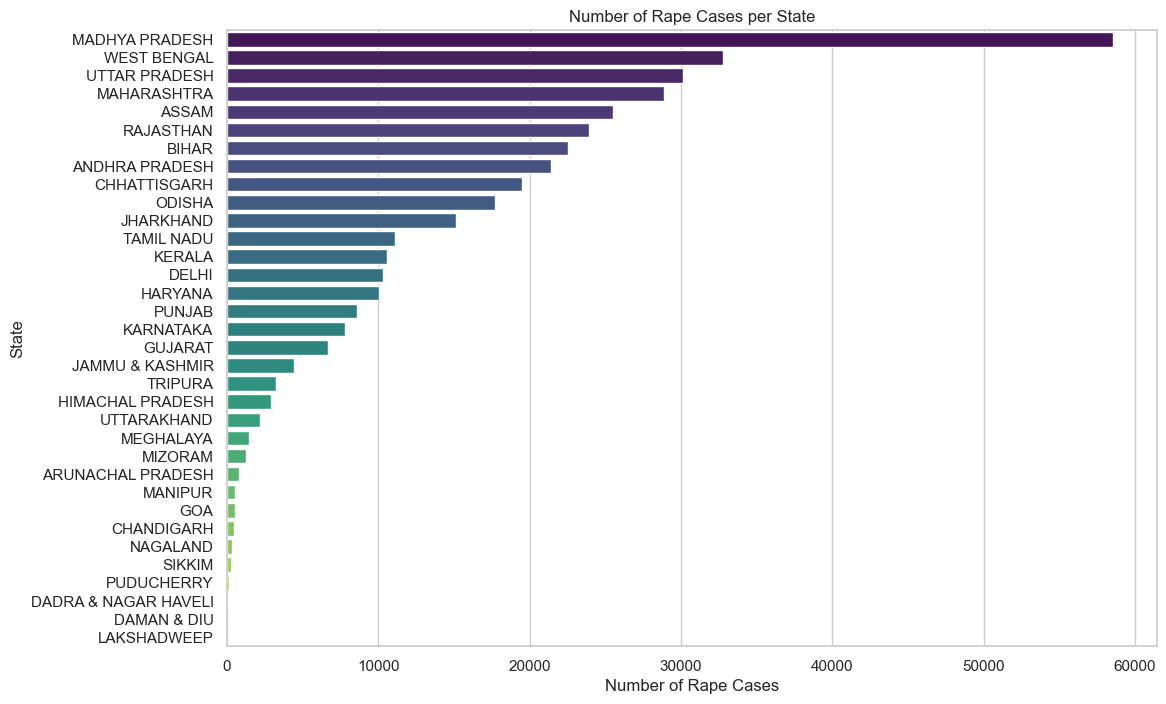

In [66]:
# Visualisation of No. of Rape cases per state
grouped_data.sort_values(by='Rape', ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sb.barplot(x='Rape', y='Area Name', data=grouped_data, palette='viridis')
plt.title('Number of Rape Cases per State')
plt.xlabel('Number of Rape Cases')
plt.ylabel('State')
plt.show()

In [67]:
# Merging both Response Variable & Predictor Variable Dataframes together into one
merged_df = pd.merge(density_df, grouped_data, on='Area Name')
merged_df

,Area Name,Average Sanctioned Police Officers per year from 2001 - 2010,Area (km2),Concentration of Police Officers per km2,Rape
0,DELHI,261384.6,1483,176.253945,10292
1,CHANDIGARH,18456.4,114,161.898246,454
2,LAKSHADWEEP,1486.4,32,46.450000,14
3,PUDUCHERRY,9711.8,479,20.275157,114
4,TRIPURA,90150.2,10486,8.597196,3248
5,JAMMU & KASHMIR,273792.0,42241,6.481665,4460
6,PUNJAB,287913.6,50362,5.716882,8600
7,GOA,18351.0,3702,4.957050,532
8,KERALA,187078.4,38863,4.813792,10592
9,WEST BENGAL,362562.4,88752,4.085118,32756


The above dataframe is the main dataframe we will work with for our Machine Learning Algorithms.

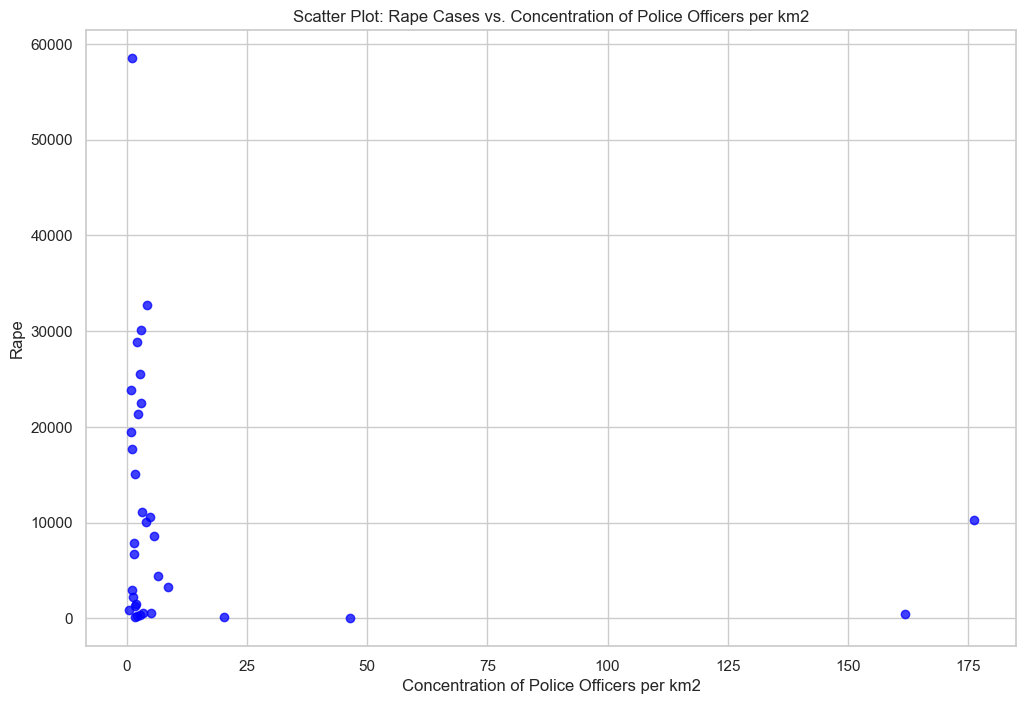

In [68]:
# Scatter plot of Rape against Concentration of Police Officers per km2
plt.figure(figsize=(12, 8))
plt.scatter(merged_df['Concentration of Police Officers per km2'], merged_df['Rape'], color='blue', alpha=0.75)
plt.title('Scatter Plot: Rape Cases vs. Concentration of Police Officers per km2')
plt.xlabel('Concentration of Police Officers per km2')
plt.ylabel('Rape')
plt.grid(True)
plt.show()

# Machine Learning Algorithms

### Correlation Coefficient between Response and Predictor Variables

Correlation coefficient = 1, indicates that the no. of Rape cases increases as Concentration of Police Officers per km2 increases.

Correlation coefficient = -1, indicates that the no. of Rape cases decreases as Concentration of Police Officers per km2 increases.

What we are expecting is the latter where correlation coefficient of -1 is "ideal" relation. It is logical to assume that with a higher concentration of police officers, no. of rape cases would be less.

Correlation Coefficient between Rape and Concentration of Police Officers per km2: -0.16174341963230454


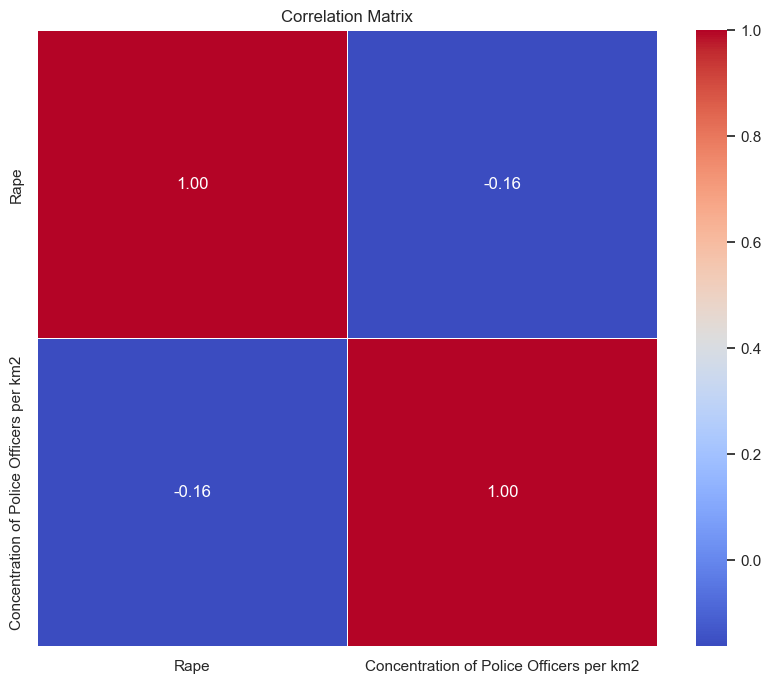

In [41]:
# Calculate correlation coefficient
correlation_coefficient = merged_df['Rape'].corr(merged_df['Concentration of Police Officers per km2'])

print("Correlation Coefficient between Rape and Concentration of Police Officers per km2:", correlation_coefficient)

# Calculate correlation matrix
corr_matrix = merged_df[['Rape', 'Concentration of Police Officers per km2']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The above shows that the no. of rape cases is inversely related to the concentration of police officers per km2, which is in line with our expectations. This is however not a strong relation, since it has a rather low correlation coefficient. 

### Linear Regression Method

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Linear Regression on Train data

Intercept 	: =  10751.989283649707
Coefficients 	: =  [-42.55340072]
Mean Squared Error: 164486797.46
Root Mean Squared Error (RMSE): 12825.24
R^2 Explained Variance: 0.02


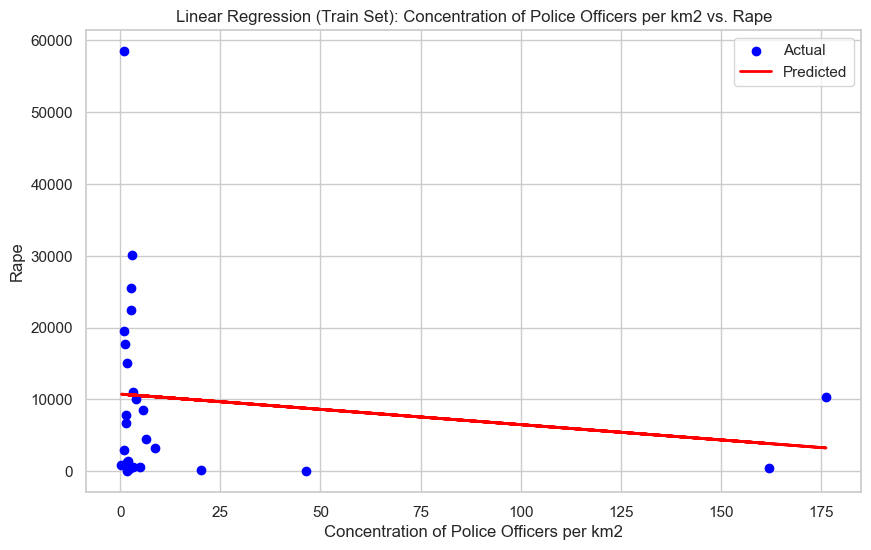

In [43]:
# Separate features (X) and target variable (y)
X = merged_df[['Concentration of Police Officers per km2']]
y = merged_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept \t: = ', linear_model.intercept_)
print('Coefficients \t: = ', linear_model.coef_)

# Make predictions
y_pred = linear_model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = linear_model.score(X_train, y_train)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance: {r2:.2f}")


# Plot the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, y_pred, color='red', linewidth=2, label='Predicted')

# Calculate the range of Concentration of Police Officers per km2
min_val = X_train.min()
max_val = X_train.max()

plt.title('Linear Regression (Train Set): Concentration of Police Officers per km2 vs. Rape')
plt.xlabel('Concentration of Police Officers per km2')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

Linear Regression on Test Data

Intercept 	: =  15447.40352915146
Coefficients 	: =  [661.79828141]
Mean Squared Error: 141144483.20
Root Mean Squared Error (RMSE): 11880.42
R^2 Explained Variance: 0.01


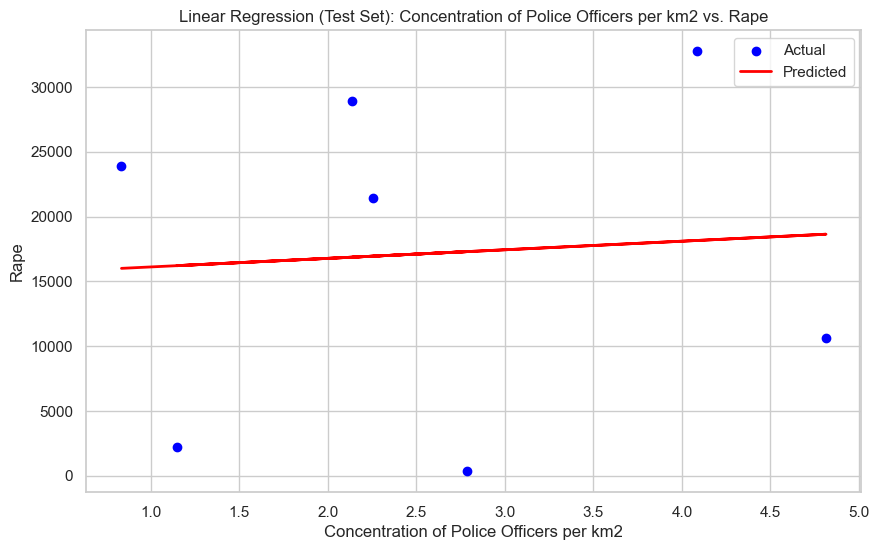

In [44]:
# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_test, y_test)

# Coefficients of the Linear Regression line
print('Intercept \t: = ', linear_model.intercept_)
print('Coefficients \t: = ', linear_model.coef_)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = linear_model.score(X_test, y_test)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance: {r2:.2f}")


# Plot the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')

# Calculate the range of Concentration of Police Officers per km2
min_val = X_test.min()
max_val = X_test.max()

plt.title('Linear Regression (Test Set): Concentration of Police Officers per km2 vs. Rape')
plt.xlabel('Concentration of Police Officers per km2')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

As we can see, the R-squared explained variance we have obtained from linear regression for both the Train & Test sets are very low. However, as seen from the plot, there are a few outliers. We can remove them to see if R-squared explained variance increases.

### Removal of Outliers

#### Using Z-Score method to remove outliers from Dataframe

In [45]:
from scipy import stats

cutdown_df = merged_df[['Area Name', 'Rape', 'Concentration of Police Officers per km2']]

In [46]:
# Calculate Z-scores for 'Rape' and 'Concentration of Police Officers per km2' columns
z_scores = stats.zscore(cutdown_df[['Rape', 'Concentration of Police Officers per km2']])

# Define threshold for outliers (e.g., Z-score > 3 or Z-score < -3)
threshold = 3

# Filter rows based on Z-scores to remove outliers
filtered_df = cutdown_df[(z_scores < threshold).all(axis=1)]

# Dataframe with outliers removed
print("\nDataFrame after removing outliers:")
filtered_df


DataFrame after removing outliers:


,Area Name,Rape,Concentration of Police Officers per km2
2,LAKSHADWEEP,14,46.450000
3,PUDUCHERRY,114,20.275157
4,TRIPURA,3248,8.597196
5,JAMMU & KASHMIR,4460,6.481665
6,PUNJAB,8600,5.716882
7,GOA,532,4.957050
8,KERALA,10592,4.813792
9,WEST BENGAL,32756,4.085118
10,HARYANA,10018,3.968086
11,MANIPUR,542,3.310897


### Linear Regression on dataframe with outliers removed (Z-Score Method)

Intercept 	: =  10715.844460463944
Coefficients 	: =  [-266.43190757]
Mean Squared Error: 101751339.75
Root Mean Squared Error (RMSE): 10087.19
R^2 Explained Variance: 0.06


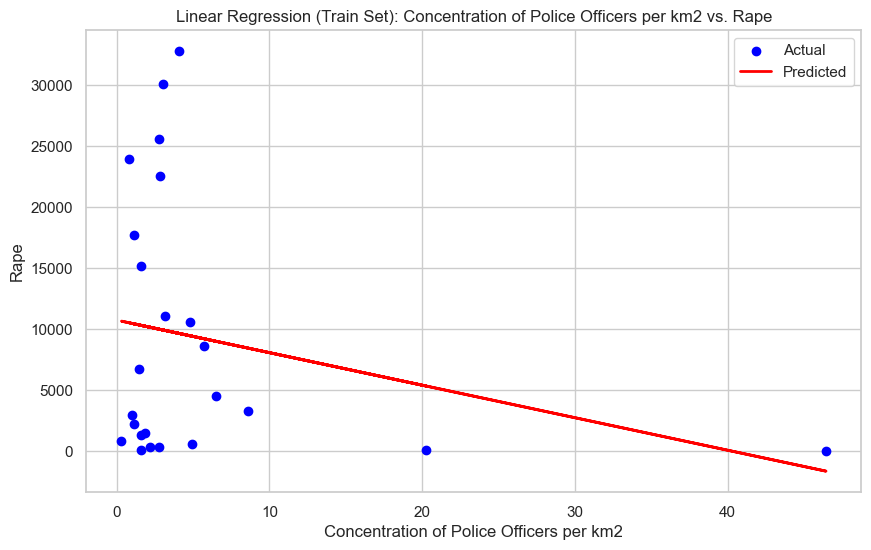

In [47]:
# Separate features (X) and target variable (y)
X = filtered_df[['Concentration of Police Officers per km2']]
y = filtered_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept \t: = ', linear_model.intercept_)
print('Coefficients \t: = ', linear_model.coef_)

# Make predictions
y_pred = linear_model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = linear_model.score(X_train, y_train)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance: {r2:.2f}")


# Plot the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, y_pred, color='red', linewidth=2, label='Predicted')

# Calculate the range of Concentration of Police Officers per km2
min_val = X_train.min()
max_val = X_train.max()

plt.title('Linear Regression (Train Set): Concentration of Police Officers per km2 vs. Rape')
plt.xlabel('Concentration of Police Officers per km2')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

After using the Z-Score method to remove outliers, we achieve a higher explained variance value of 0.06 on the train set, as compared to 0.02 before the removal of outliers. This is however, still very low and does not indicate a strong prediction method.

We try to use other methods to remove outliers, to see if it achieves a better outcome on explained variance.

#### Using IQR (Inter-Quartile Range) method to remove outliers from Dataframe

In [48]:
# Calculate the IQR for 'Rape' and 'Concentration of Police Officers per km2'
Q1_rape = merged_df['Rape'].quantile(0.25)
Q3_rape = merged_df['Rape'].quantile(0.75)
IQR_rape = Q3_rape - Q1_rape

Q1_cop = merged_df['Concentration of Police Officers per km2'].quantile(0.25)
Q3_cop = merged_df['Concentration of Police Officers per km2'].quantile(0.75)
IQR_cop = Q3_cop - Q1_cop

# Define outlier boundaries
lower_bound_rape = Q1_rape - 1.5 * IQR_rape
upper_bound_rape = Q3_rape + 1.5 * IQR_rape

lower_bound_cop = Q1_cop - 1.5 * IQR_cop
upper_bound_cop = Q3_cop + 1.5 * IQR_cop

# Filter DataFrame to remove outliers
filtered_df2 = merged_df[
    (merged_df['Rape'] >= lower_bound_rape) & (filtered_df['Rape'] <= upper_bound_rape) &
    (merged_df['Concentration of Police Officers per km2'] >= lower_bound_cop) &
    (merged_df['Concentration of Police Officers per km2'] <= upper_bound_cop)
]

print("\nDataFrame after removing outliers:")
filtered_df2


DataFrame after removing outliers:


,Area Name,Average Sanctioned Police Officers per year from 2001 - 2010,Area (km2),Concentration of Police Officers per km2,Rape
4,TRIPURA,90150.2,10486,8.597196,3248
5,JAMMU & KASHMIR,273792.0,42241,6.481665,4460
6,PUNJAB,287913.6,50362,5.716882,8600
7,GOA,18351.0,3702,4.957050,532
8,KERALA,187078.4,38863,4.813792,10592
9,WEST BENGAL,362562.4,88752,4.085118,32756
10,HARYANA,175437.0,44212,3.968086,10018
11,MANIPUR,73922.4,22327,3.310897,542
12,TAMIL NADU,410843.2,130058,3.158923,11076
13,UTTAR PRADESH,722843.4,240928,3.000247,30106


### Linear Regression on dataframe with outliers removed (IQR Method)

Intercept 	: =  9539.82095040076
Coefficients 	: =  [56.33065211]
Mean Squared Error: 104133227.12
Root Mean Squared Error (RMSE): 10204.57
R^2 Explained Variance: 0.00


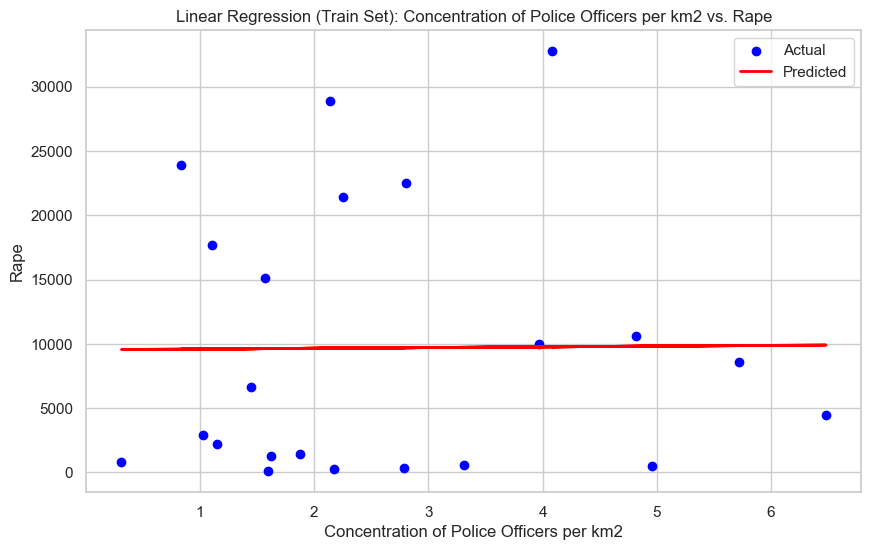

In [49]:
# Separate features (X) and target variable (y)
X = filtered_df2[['Concentration of Police Officers per km2']]
y = filtered_df2['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept \t: = ', linear_model.intercept_)
print('Coefficients \t: = ', linear_model.coef_)

# Make predictions
y_pred = linear_model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = linear_model.score(X_train, y_train)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance: {r2:.2f}")


# Plot the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, y_pred, color='red', linewidth=2, label='Predicted')

# Calculate the range of Concentration of Police Officers per km2
min_val = X_train.min()
max_val = X_train.max()

plt.title('Linear Regression (Train Set): Concentration of Police Officers per km2 vs. Rape')
plt.xlabel('Concentration of Police Officers per km2')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

Using the IQR method to remove outliers, we unfortunately achieve a worse algorithm for prediction, with our explained variance falling to 0.0 on the train set.

In conclusion, the best result if we were to use linear regression for prediction, is the following combination:
1. Z-Score method to remove outliers
2. Linear Regression method for prediction (Explained Variance = 0.06)


## Using Polynomial Regression

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Using degree 2 polynomial regression

Intercept 	: =  11235.375082236305
Coefficients 	: =  [   0.         -454.31718908    4.24064749]
Mean Squared Error (Train Set): 101523177.27
Root Mean Squared Error (RMSE): 10075.87
R^2 Explained Variance (Train Set): 0.06


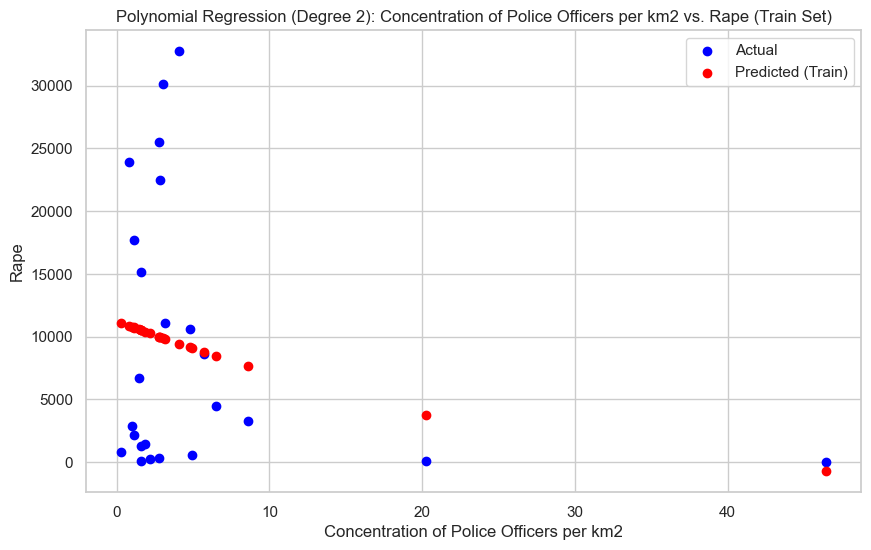

In [51]:
# Separate features (X) and target variable (y)
X = filtered_df[['Concentration of Police Officers per km2']]
y = filtered_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features transformation
degree = 2  # Define the degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Coefficients of the Polynomial Regression line
print('Intercept \t: = ', poly_model.intercept_)
print('Coefficients \t: = ', poly_model.coef_)

# Make predictions
y_train_pred = poly_model.predict(X_train_poly)

# Evaluate the model
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = poly_model.score(X_train_poly, y_train)
print(f"Mean Squared Error (Train Set): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance (Train Set): {r2:.2f}")

# Plot the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_train_pred, color='red', label='Predicted (Train)')
plt.title(f'Polynomial Regression (Degree {degree}): Concentration of Police Officers per km2 vs. Rape (Train Set)')
plt.xlabel('Concentration of Police Officers per km2')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

#### Using degree 3 polynomial regression

Intercept 	: =  8380.996702346554
Coefficients 	: =  [   0.         1089.38383998 -118.46089691    1.96295833]
Mean Squared Error (Train Set): 98214651.78
Root Mean Squared Error (RMSE): 9910.33
R^2 Explained Variance (Train Set): 0.09


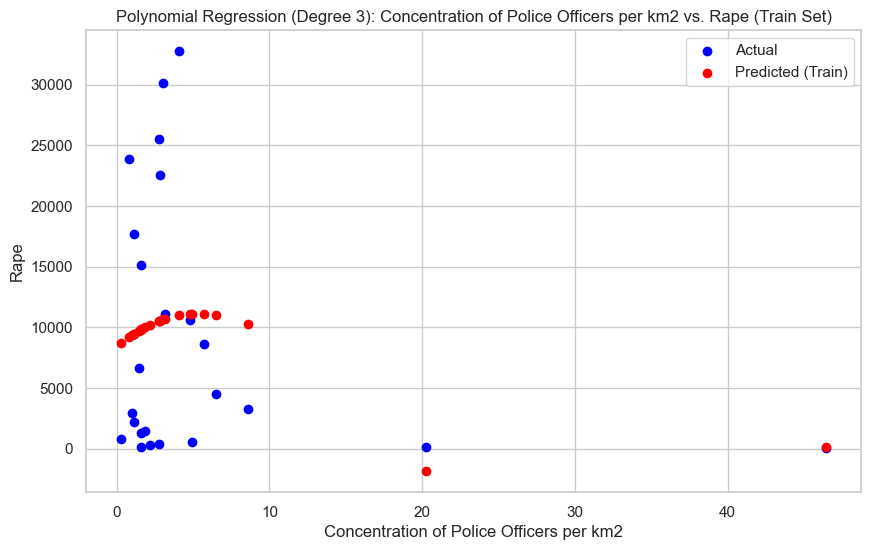

In [52]:
# Separate features (X) and target variable (y)
X = filtered_df[['Concentration of Police Officers per km2']]
y = filtered_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features transformation
degree = 3  # Define the degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Coefficients of the Polynomial Regression line
print('Intercept \t: = ', poly_model.intercept_)
print('Coefficients \t: = ', poly_model.coef_)

# Make predictions
y_train_pred = poly_model.predict(X_train_poly)

# Evaluate the model
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = poly_model.score(X_train_poly, y_train)
print(f"Mean Squared Error (Train Set): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance (Train Set): {r2:.2f}")

# Plot the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_train_pred, color='red', label='Predicted (Train)')
plt.title(f'Polynomial Regression (Degree {degree}): Concentration of Police Officers per km2 vs. Rape (Train Set)')
plt.xlabel('Concentration of Police Officers per km2')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

#### Using degree 4 polynomial regression

Intercept 	: =  142.27369927001746
Coefficients 	: =  [ 0.00000000e+00  8.67755685e+03 -1.61830160e+03  8.03137118e+01
 -1.06560169e+00]
Mean Squared Error (Train Set): 88862731.96
Root Mean Squared Error (RMSE): 9426.70
R^2 Explained Variance (Train Set): 0.18


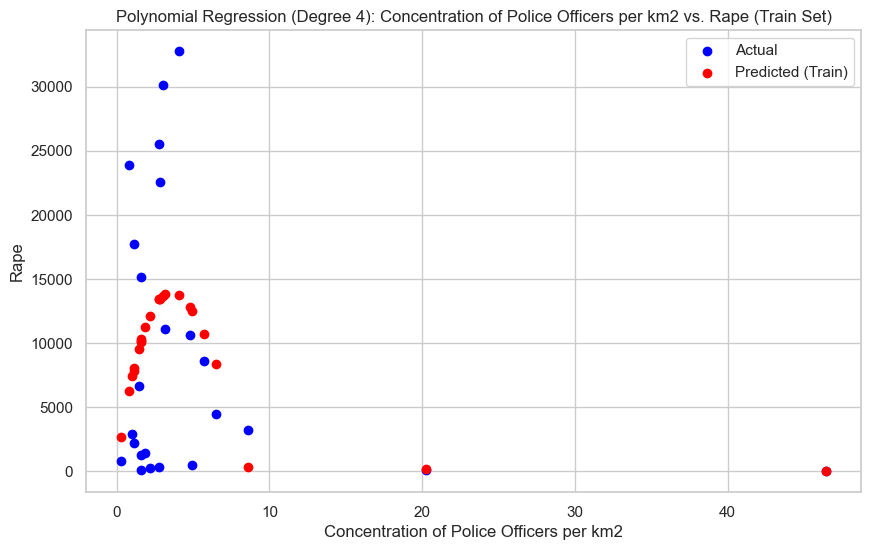

In [53]:
# Separate features (X) and target variable (y)
X = filtered_df[['Concentration of Police Officers per km2']]
y = filtered_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features transformation
degree = 4  # Define the degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Coefficients of the Polynomial Regression line
print('Intercept \t: = ', poly_model.intercept_)
print('Coefficients \t: = ', poly_model.coef_)

# Make predictions
y_train_pred = poly_model.predict(X_train_poly)

# Evaluate the model
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = poly_model.score(X_train_poly, y_train)
print(f"Mean Squared Error (Train Set): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance (Train Set): {r2:.2f}")

# Plot the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_train_pred, color='red', label='Predicted (Train)')
plt.title(f'Polynomial Regression (Degree {degree}): Concentration of Police Officers per km2 vs. Rape (Train Set)')
plt.xlabel('Concentration of Police Officers per km2')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

#### Using degree 6 polynomial regression

Intercept 	: =  14900.285500283042
Coefficients 	: =  [ 0.00000000e+00 -2.20212806e+04  1.67867971e+04 -4.22843231e+03
  4.25589774e+02 -1.66417636e+01  1.99706984e-01]
Mean Squared Error (Train Set): 80927247.01
Root Mean Squared Error (RMSE): 8995.96
R^2 Explained Variance (Train Set): 0.25


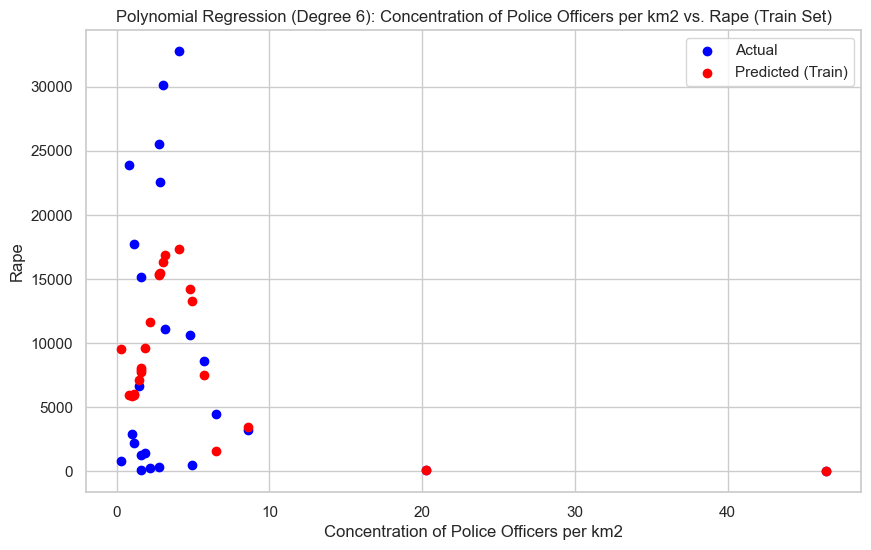

In [54]:
# Separate features (X) and target variable (y)
X = filtered_df[['Concentration of Police Officers per km2']]
y = filtered_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features transformation
degree = 6  # Define the degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Coefficients of the Polynomial Regression line
print('Intercept \t: = ', poly_model.intercept_)
print('Coefficients \t: = ', poly_model.coef_)

# Make predictions
y_train_pred = poly_model.predict(X_train_poly)

# Evaluate the model
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = poly_model.score(X_train_poly, y_train)
print(f"Mean Squared Error (Train Set): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance (Train Set): {r2:.2f}")

# Plot the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_train_pred, color='red', label='Predicted (Train)')
plt.title(f'Polynomial Regression (Degree {degree}): Concentration of Police Officers per km2 vs. Rape (Train Set)')
plt.xlabel('Concentration of Police Officers per km2')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

#### Using degree 8 polynomial regression

Intercept 	: =  -38996.794759114586
Coefficients 	: =  [ 0.00000000e+00  1.97253787e+05 -2.51410430e+05  1.39131909e+05
 -3.81276664e+04  5.43650108e+03 -3.94023465e+02  1.29091559e+01
 -1.41968006e-01]
Mean Squared Error (Train Set): 55233673.37
Root Mean Squared Error (RMSE): 7431.94
R^2 Explained Variance (Train Set): 0.49


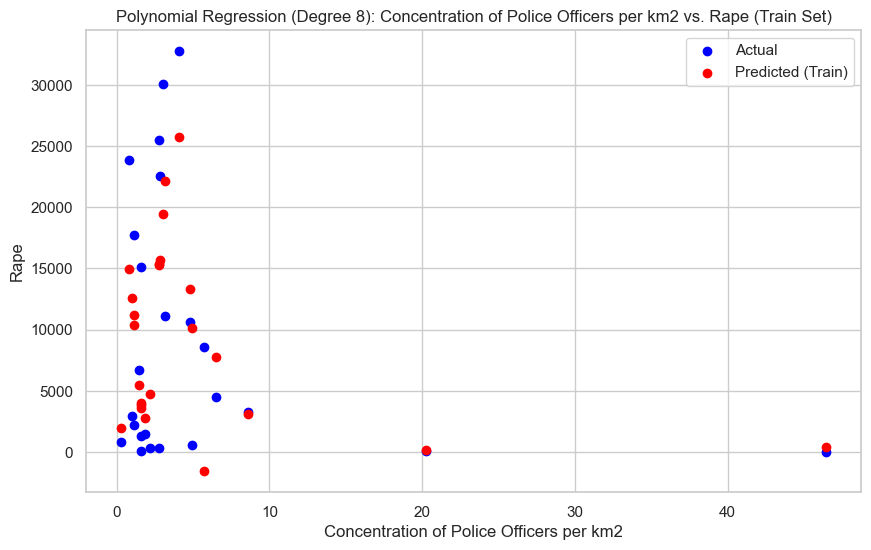

In [55]:
# Separate features (X) and target variable (y)
X = filtered_df[['Concentration of Police Officers per km2']]
y = filtered_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features transformation
degree = 8  # Define the degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Coefficients of the Polynomial Regression line
print('Intercept \t: = ', poly_model.intercept_)
print('Coefficients \t: = ', poly_model.coef_)

# Make predictions
y_train_pred = poly_model.predict(X_train_poly)

# Evaluate the model
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = poly_model.score(X_train_poly, y_train)
print(f"Mean Squared Error (Train Set): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance (Train Set): {r2:.2f}")

# Plot the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_train_pred, color='red', label='Predicted (Train)')
plt.title(f'Polynomial Regression (Degree {degree}): Concentration of Police Officers per km2 vs. Rape (Train Set)')
plt.xlabel('Concentration of Police Officers per km2')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

#### Using degree 9 polynomial regression

Intercept 	: =  -729.7961018880214
Coefficients 	: =  [ 0.00000000e+00  2.55275653e+04 -5.47419665e+03 -2.44852722e+04
  2.03784288e+04 -6.47593240e+03  9.91699761e+02 -7.46891412e+01
  2.49754557e+00 -2.77475990e-02]
Mean Squared Error (Train Set): 64276707.01
Root Mean Squared Error (RMSE): 8017.28
R^2 Explained Variance (Train Set): 0.41


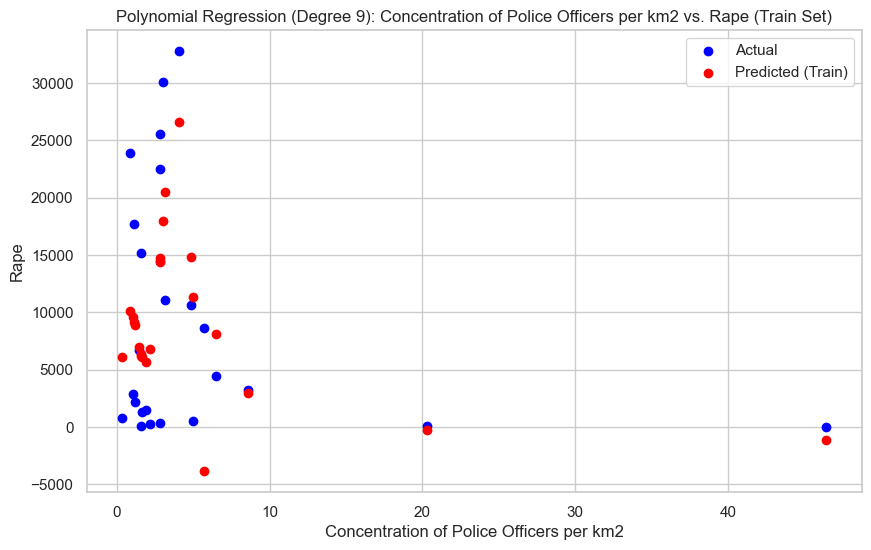

In [56]:
# Separate features (X) and target variable (y)
X = filtered_df[['Concentration of Police Officers per km2']]
y = filtered_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features transformation
degree = 9  # Define the degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Coefficients of the Polynomial Regression line
print('Intercept \t: = ', poly_model.intercept_)
print('Coefficients \t: = ', poly_model.coef_)

# Make predictions
y_train_pred = poly_model.predict(X_train_poly)

# Evaluate the model
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = poly_model.score(X_train_poly, y_train)
print(f"Mean Squared Error (Train Set): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance (Train Set): {r2:.2f}")

# Plot the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_train_pred, color='red', label='Predicted (Train)')
plt.title(f'Polynomial Regression (Degree {degree}): Concentration of Police Officers per km2 vs. Rape (Train Set)')
plt.xlabel('Concentration of Police Officers per km2')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

#### Using degree 10 polynomial regression

Intercept 	: =  5378.825602213541
Coefficients 	: =  [ 0.00000000e+00  1.15113086e+01  4.29807266e+01  1.07888399e+02
  2.01204686e+02  1.96877795e+02 -1.45400676e+02  3.08265983e+01
 -2.74051243e+00  9.98499676e-02 -1.15674134e-03]
Mean Squared Error (Train Set): 73132996.60
Root Mean Squared Error (RMSE): 8551.78
R^2 Explained Variance (Train Set): 0.32


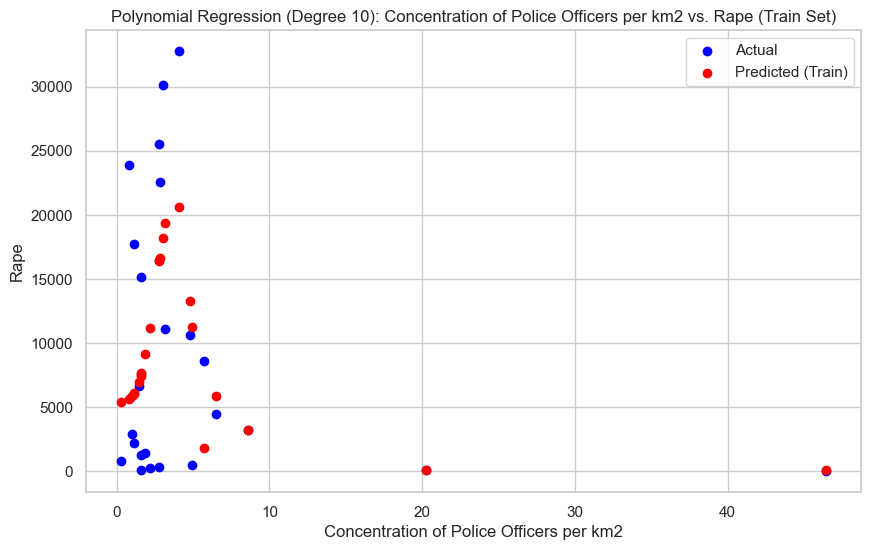

In [57]:
# Separate features (X) and target variable (y)
X = filtered_df[['Concentration of Police Officers per km2']]
y = filtered_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features transformation
degree = 10  # Define the degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Coefficients of the Polynomial Regression line
print('Intercept \t: = ', poly_model.intercept_)
print('Coefficients \t: = ', poly_model.coef_)

# Make predictions
y_train_pred = poly_model.predict(X_train_poly)

# Evaluate the model
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = poly_model.score(X_train_poly, y_train)
print(f"Mean Squared Error (Train Set): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance (Train Set): {r2:.2f}")

# Plot the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_train_pred, color='red', label='Predicted (Train)')
plt.title(f'Polynomial Regression (Degree {degree}): Concentration of Police Officers per km2 vs. Rape (Train Set)')
plt.xlabel('Concentration of Police Officers per km2')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

We are using the dataset with outliers removed using the Z-Score method.
Values of R-Squared Explained Variance for each degree of polynomial regression:

- Degree 2: 0.09
- Degree 3: 0.09
- Degree 4: 0.18
- Degree 6: 0.25
- Degree 8: 0.49
- Degree 9: 0.41
- Degree 10: 0.32

We can thus conclude that the 8th degree polynomial regression is the best prediction model for this case, with an explained variance of 0.49.

## K-Nearest Neighbours Method (KNN)

#### Using the dataset without outliers removed:

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error: 113858707.11
Root Mean Squared Error (RMSE): 10670.46
R^2 Explained Variance: 0.32


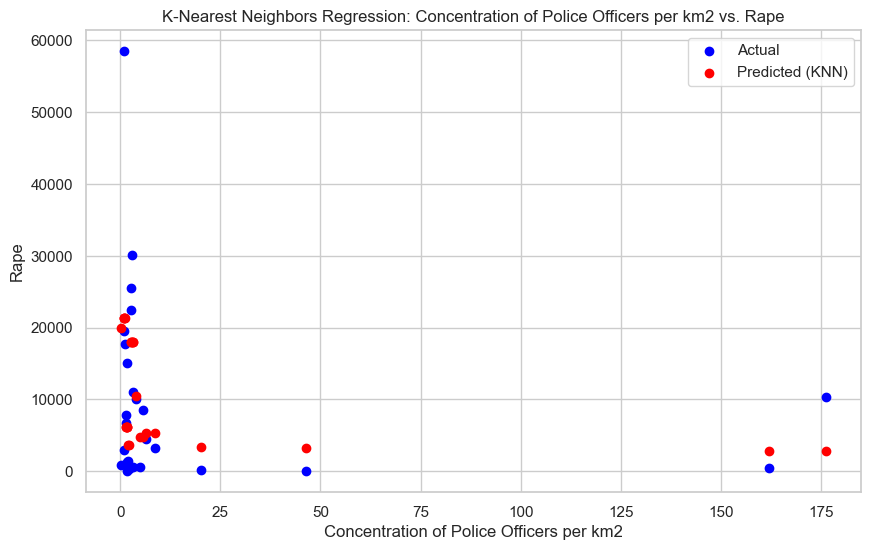

In [59]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already loaded and preprocessed your dataset

# Separate features (X) and target variable (y)
X = merged_df[['Concentration of Police Officers per km2']]
y = merged_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the KNN regression model
k = 5  # Set the number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = knn_model.score(X_train, y_train)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance: {r2:.2f}")

# Plot the KNN predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_pred, color='red', label='Predicted (KNN)')
plt.title('K-Nearest Neighbors Regression: Concentration of Police Officers per km2 vs. Rape')
plt.xlabel('Concentration of Police Officers per km2')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

#### Using the dataset with outliers removed via Z-Score Method:

Mean Squared Error: 67169517.64
Root Mean Squared Error (RMSE): 8195.70
R^2 Explained Variance: 0.38


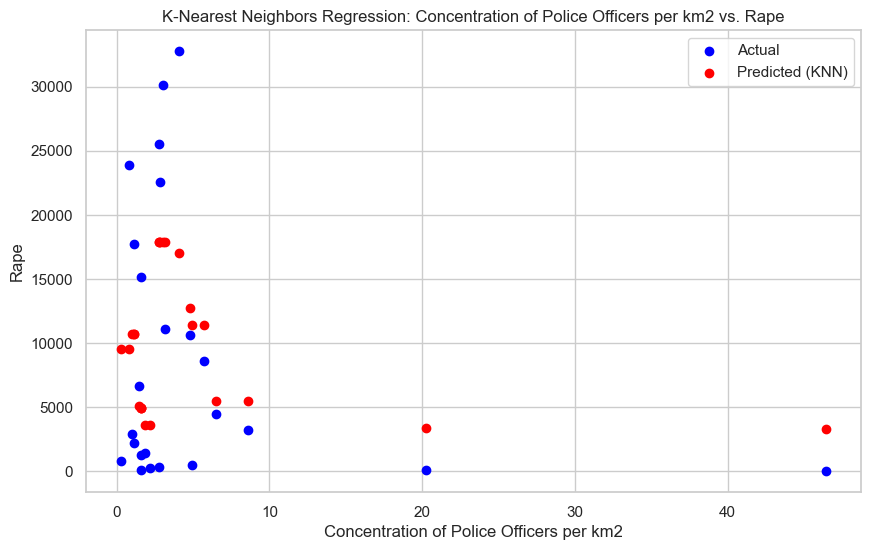

In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already loaded and preprocessed your dataset

# Separate features (X) and target variable (y)
X = filtered_df[['Concentration of Police Officers per km2']]
y = filtered_df['Rape']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the KNN regression model
k = 5  # Set the number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = knn_model.score(X_train, y_train)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Explained Variance: {r2:.2f}")

# Plot the KNN predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_train, y_pred, color='red', label='Predicted (KNN)')
plt.title('K-Nearest Neighbors Regression: Concentration of Police Officers per km2 vs. Rape')
plt.xlabel('Concentration of Police Officers per km2')
plt.ylabel('Rape')
plt.legend()
plt.grid(True)
plt.show()

Using the K-Nearest Neighbours (KNN) Method, we achieve more accurate results when we use the outliers removed dataset, which gives us an explained variance of 0.38, whilst the dataset without outliers removed gave us an explained variance of 0.32.

### Conclusion

After using 3 different machine learning methods, I have found that the polynomial regression method (8th degree) is the best predictor of our response variable, with an explained variance of 0.49, compared to other methods such as linear regression and K-Nearest Neighbours.